# 3. Exploring Data Analysis

## Import libraries and load datasets

In [12]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
# Load data
df_cleaned = pd.read_csv('../data/clean_hcmc_waq.csv')
df_cleaned['date_time'] = pd.to_datetime(df_cleaned['date_time'])

## 3.1. Exploring data

In [67]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   date_time                17544 non-null  datetime64[ns, UTC]
 1   temperature_2m           17544 non-null  float64            
 2   relative_humidity_2m     17544 non-null  float64            
 3   dew_point_2m             17544 non-null  float64            
 4   apparent_temperature     17544 non-null  float64            
 5   precipitation            17544 non-null  float64            
 6   cloud_cover              17544 non-null  float64            
 7   vapour_pressure_deficit  17544 non-null  float64            
 8   wind_speed_10m           17544 non-null  float64            
 9   wind_direction_10m       17544 non-null  float64            
 10  pm10                     17544 non-null  float64            
 11  pm2_5                    175

In [68]:
df_cleaned.head()

,date_time,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,cloud_cover,vapour_pressure_deficit,wind_speed_10m,wind_direction_10m,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,us_aqi,weather_status
0,2022-10-01 00:00:00+00:00,25.511000,94.49476,24.561,31.543438,1.3,44.700000,0.179606,2.902413,209.74480,61.2,42.1,1123.0,50.80,11.50,4.0,73.652490,Light Rain
1,2022-10-01 01:00:00+00:00,26.411001,88.26100,24.311,31.320229,0.6,55.500000,0.403905,9.504272,232.69597,36.9,24.9,906.0,43.05,11.25,14.0,76.471634,Moderate Drizzle
2,2022-10-01 02:00:00+00:00,26.911001,88.03870,24.761,32.211530,0.7,46.200005,0.423807,8.788720,214.99210,28.0,18.5,598.0,31.95,10.90,27.0,77.597520,Moderate Drizzle
3,2022-10-01 03:00:00+00:00,28.011000,85.29904,25.311,33.920822,0.6,100.000000,0.555415,7.072878,194.74360,24.2,15.9,281.0,19.70,10.50,48.0,78.182625,Moderate Drizzle
4,2022-10-01 04:00:00+00:00,29.011000,78.12226,24.811,34.491055,0.4,100.000000,0.875935,7.754637,201.80147,26.0,17.1,213.0,14.25,10.50,67.0,78.430855,Light Drizzle


### Features

This dataset contains 17,544 records capturing various weather and air quality metrics at specific timestamps. Each entry includes:

1. `date_time`: Timestamp for each entry.
2. `temperature_2m`: Ambient temperature (°C) at 2m above ground.
3. `relative_humidity_2m`: Air moisture percentage at 2m.
4. `dew_point_2m`: Temperature (°C) at which air moisture condenses.
5. `apparent_temperature`: Perceived “feels-like” temperature.
6. `precipitation`: Rainfall in mm.
7. `cloud_cover`: Sky cloudiness percentage.
8. `vapour_pressure_deficit`: Difference between actual and max vapor pressure.
9. `wind_speed_10m`: Wind speed at 10m (m/s).
10. `wind_direction_10m`: Wind direction at 10m (degrees).
11. `pm10 and pm2_5`: Particulate matter levels (PM10 and PM2.5).
12. `carbon_monoxide, nitrogen_dioxide, sulphur_dioxide, ozone`: Concentrations of major air pollutants (ppm).
13. `us_aqi`: Air Quality Index.
14. `weather_status`: Observed weather condition descriptor.

### Numerical analysis using descriptive statistics

**Basic descriptive statistics include:**
* ***Mean***: The average value of all the data points in the dataset.
* ***Median***: The middle value of the dataset when the data points are sorted in ascending order.
* ***Mode***: The most frequent value in the dataset.
* ***Range***: The difference between the largest and smallest values in the dataset.
* ***Interquartile range (IQR)***: The difference between the 75th and 25th percentiles of the dataset.
* ***Variance***: A measure of how spread out the data points are around the mean.
* ***Standard deviation (std dev)***: The square root of the variance.
* ***Coefficient of variation***: A measure of relative dispersion, calculated as the standard deviation divided by the mean.
* ***Skewness***: A measure of the asymmetry of the distribution.
* ***Kurtosis***: A measure of the peakedness of the distribution.

In [ ]:
df_num = df_cleaned.select_dtypes(exclude='object').copy()
df_num.describe()

,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,cloud_cover,vapour_pressure_deficit,wind_speed_10m,wind_direction_10m,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,us_aqi
count,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000
mean,27.713273,77.605035,23.041187,32.235799,0.261018,41.715910,0.908258,8.811136,178.227551,35.004606,23.450108,448.030096,28.219779,20.958279,52.991678,74.183055
std,3.113382,16.307714,2.211417,3.388188,1.082902,27.539359,0.775178,4.670804,90.356012,16.992190,11.790435,256.733868,17.908913,13.631780,41.059168,19.428913
min,18.886003,33.975716,17.611000,23.511057,0.000000,0.000000,0.000000,0.000000,1.169115,0.400000,0.300000,59.000000,0.000000,0.000000,0.000000,20.203910
25%,25.411001,68.137776,21.811000,30.017985,0.000000,25.800001,0.299158,5.351785,119.463693,22.600000,14.800000,271.000000,14.900000,10.600000,20.000000,59.645390
50%,27.011000,81.523735,23.861000,31.868264,0.000000,35.100002,0.656393,7.968939,162.645890,31.500000,21.000000,380.000000,24.000000,19.000000,43.000000,71.715420
75%,29.761000,90.912483,24.611000,34.355937,0.100000,53.700005,1.283162,11.609651,242.783970,43.500000,29.300000,553.000000,38.100000,29.000000,79.000000,85.939710
max,36.285998,100.000000,27.261000,40.862864,21.400000,100.000000,2.759168,30.085318,360.000000,158.800000,110.600000,3149.000000,170.350000,56.600000,272.000000,125.381190


#### ***Comment:***
* The dataset indicates relatively stable weather conditions with temperatures averaging around 27.7°C and humidity at 77.6%. This suggests that the climate is consistently warm and humid, typical for tropical regions like Ho Chi Minh City.
* While the average air quality index (AQI) is 74.2, there is noticeable variability with some days experiencing higher levels of pollution, particularly with PM2.5 and nitrogen dioxide. This indicates that air quality fluctuates, potentially due to factors like traffic or industrial activity.
* The range in precipitation (from 0 mm to 21.4 mm) and cloud cover (from 0% to 100%) highlights the dynamic weather patterns in the city. These fluctuations suggest the occurrence of both dry, sunny periods and intense rainfall.

### Correlation between features

To effectively predict air quality and weather conditions in HCMC, understanding the relationships between various weather and air quality factors is essential. This analysis helps identify the key features that significantly impact environmental conditions and contribute most to accurate predictions of air quality and weather patterns.

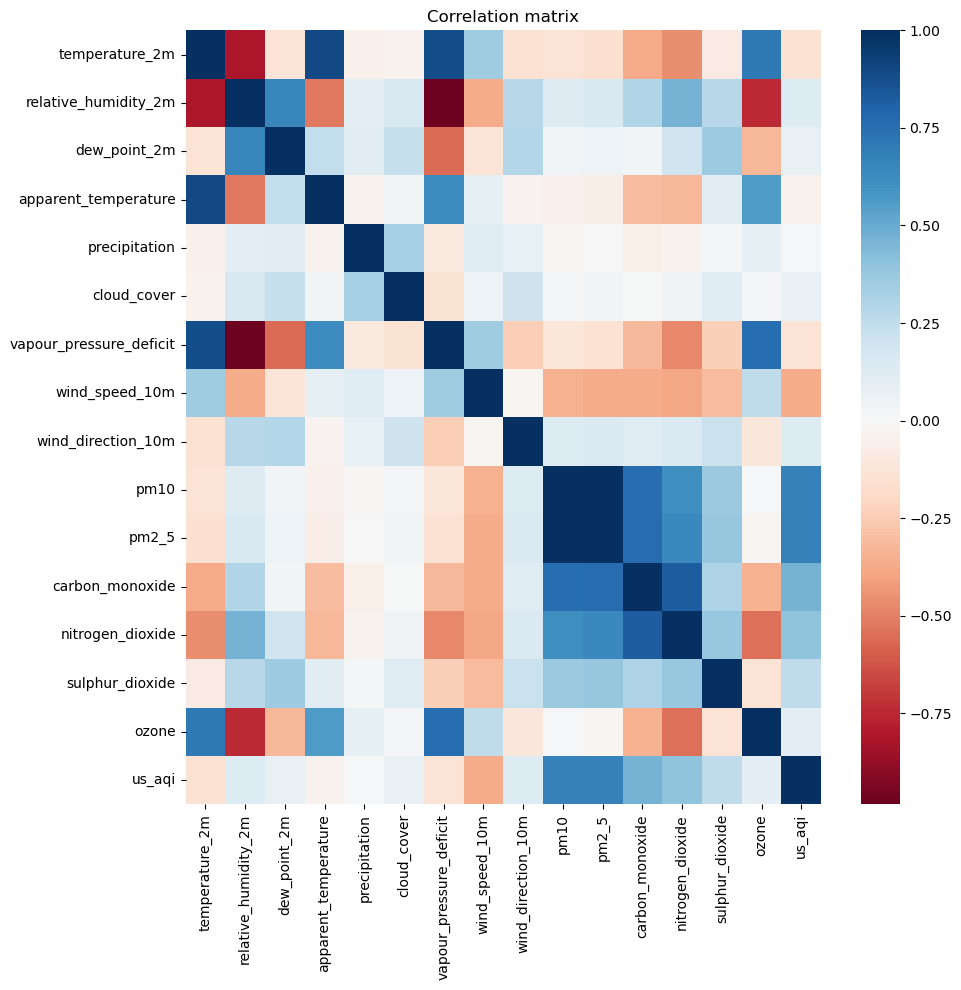

In [11]:
# plot the correlation matrix
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_num.corr(), cmap='RdBu', center=0,ax=ax)
plt.title('Correlation matrix')
plt.tight_layout()
plt.show()

#### ***Comment:***
* We can see the **strongest correlations**:
    * ***Possitive correlation between PM10 and PM2.5***: This suggests that these pollutants often come from similar sources or are influenced by similar environmental conditions.
    * ***Negative correlation between Relative Humidity and Vapour pressure deficit***: Higher humidity means the air is closer to saturation, resulting in a lower VPD. This relationship is essential in understanding moisture levels in the air, which impacts weather patterns and air quality condition.
* Between **Weather and Air Quality**, there're some important correlations:
    * ***Positive correltion between Ozone and Temperature***: As temperature rises, ozone levels tend to increase. This is likely due to warmer temperatures accelerating chemical reactions that produce ozone, especially in urban areas with pollutants, impacting air quality on hot days.
    * ***Negative correlation between Ozone and Relative Humidity***: Higher humidity conditions may hinder ozone formation or persistence, a pattern observed in some urban atmospheres.

$\Rightarrow$ There're connections between weather and air quality factors in HCMC. Pollutants like PM10 and PM2.5 tend to increase together, suggesting common sources or environmental influences. Humidity and vapour pressure deficit are inversely related, showing how moisture levels impact air conditions. Temperature and humidity also influence ozone levels, with warmer temperatures increasing ozone and higher humidity potentially reducing it. These insights emphasize the complex interactions between weather and air quality, which are crucial for effective monitoring and management of urban air conditions.

## 3.2. Making Questions

### Question 1: Is there a correlation between wind speed/direction and PM10 levels? Does wind from certain directions bring higher pollution levels?

**Answering this question will** help us understand how wind patterns impact air quality, aiding in pollution prediction and control. This insight can assist urban planners and environmental agencies in identifying areas at risk of higher pollution due to prevailing winds, enabling more targeted interventions.

**How we answer this question:** 
* Analyze correlations between `wind_speed_10m`, `wind_direction_10m`, and pollutant levels (`pm10`) to see if higher or lower wind speeds affect pollutant concentrations.
* Determine if specific wind directions correlate with higher pollutant levels by segmenting data by `wind_direction_10m` and `pm10` values for each direction.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16276\3146498183.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wind_pm['wind_dir_bin'] = pd.cut(df_wind_pm['wind_direction_10m'], bins=np.arange(0, 361, 30), right=False)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16276\3146498183.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wind_pm['wind_speed_bin'] = pd.cut(df_wind_pm['wind_speed_10m'], bins=np.arange(0, df_wind_pm['wind_speed_10m'].max() + 1, 2))


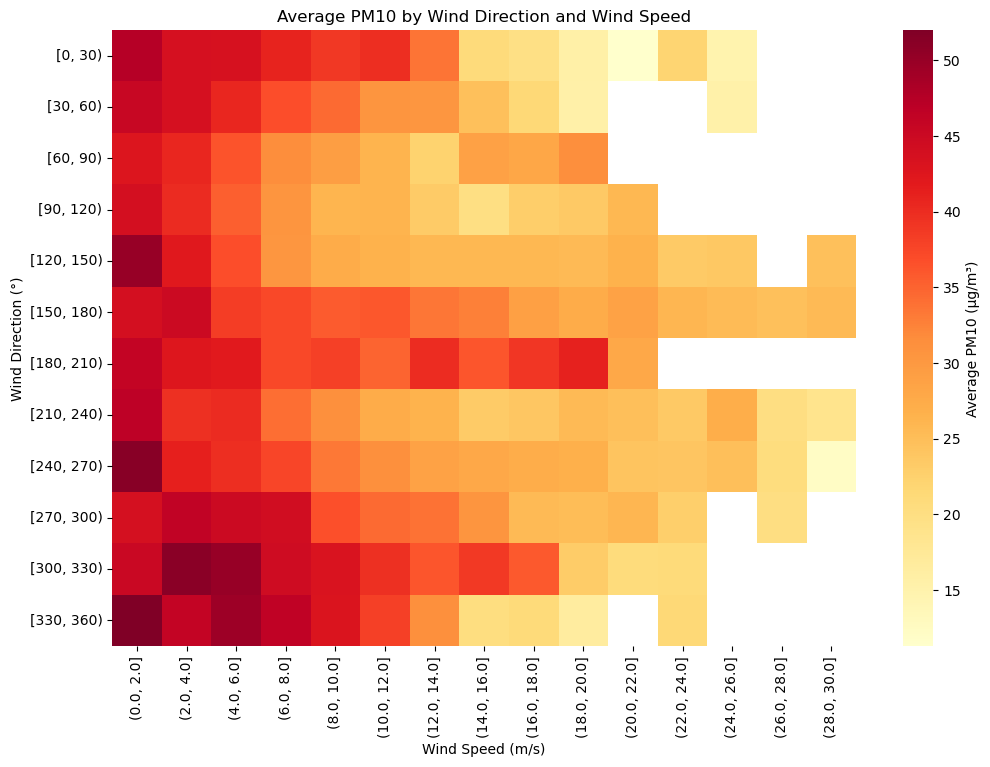

In [55]:
df_wind_pm = df_cleaned[['wind_speed_10m', 'wind_direction_10m', 'pm10']]

df_wind_pm['wind_dir_bin'] = pd.cut(df_wind_pm['wind_direction_10m'], bins=np.arange(0, 361, 30), right=False)
df_wind_pm['wind_speed_bin'] = pd.cut(df_wind_pm['wind_speed_10m'], bins=np.arange(0, df_wind_pm['wind_speed_10m'].max() + 1, 2))

# Calculate average PM10 concentration for each bin
heatmap_data = df_wind_pm.groupby(['wind_dir_bin', 'wind_speed_bin'])['pm10'].mean().unstack()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlOrRd', cbar_kws={'label': 'Average PM10 (µg/m³)'})
plt.title('Average PM10 by Wind Direction and Wind Speed')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Wind Direction (°)')
plt.show()


#### **Comments**
Based on the heatmap, we can observe the following:

* ***Wind Speed and PM10 Levels:*** Higher wind speeds (to the right on the x-axis) generally correlate with lower average PM10 concentrations. This trend suggests that as wind speed increases, it disperses particulate matter, lowering pollution concentrations in the area.

* ***Wind Direction and PM10 Levels:*** There are some directions that show relatively higher PM10 levels. For example:
    * Lower wind speeds (left side of the x-axis) in the direction range 0°-120° (top of the y-axis) are associated with higher PM10 concentrations.
    * The directions around 270°-300° also have slightly elevated PM10 levels, although not as high as those in the 0°-120° range.
    
$\Rightarrow$ This indicates that winds from certain directions (0°-120° and to a lesser extent, 270°-300°) might bring in higher levels of particulate pollution when the wind speed is low. Wind direction and speed both impact PM10 levels, with lower speeds and specific directions correlating with higher pollution. 

### Question 2: How do extreme weather events (identified by weather_status) affect air quality parameters, and what are the lag effects on pollutant concentrations?

**Answering this question will** help us understand the impact of extreme weather events on air quality can help anticipate pollution levels following events like storms or heatwaves. This is crucial for managing public health responses and air quality controls during and after such events.

**How we answer this question:** 
* Use `weather_status` to identify extreme weather events (e.g., Heavy Rain, Dense Drizzle) and then analyze pollutant levels (`pm10`, `pm2_5`, `carbon_monoxide, nitrogen_dioxide, sulphur_dioxide`, `ozone`, and `us_aqi`) during and after these events.
* To assess lag effects, examine pollutant levels at various intervals after extreme weather events, such as 1 hour, 6 hours, and 24 hours post-event, to observe how pollutant concentrations respond over time.

### Question 3: Are there distinct seasonal or monthly patterns in air quality metrics, and how do they correlate with changing weather conditions? 

**Answering this question will** help us understand understand how air quality varies throughout the year and the influence of seasonal weather changes. This insight is valuable for forecasting pollution trends, informing public health advisories, and developing seasonal strategies to manage air quality.

**How we answer this question:** 
* Use date_time to group data by month or season, and analyze trends in air quality metrics like `pm10`, `pm2_5`, `us_aqi`, and other pollutants over time.
* Evaluate correlations between weather metrics (`temperature_2m`, `relative_humidity_2m`, `precipitation`, `cloud_cover`, etc.) and air quality metrics to observe seasonal changes in air quality.

In [94]:
df2 = df_cleaned.copy()

# Extract year, month and season from 'date_time'
df2['month'] = df2['date_time'].dt.month
# Define seasons based on months (adjust if needed for your region)
season_mapping = {
    1: 'Dry', 2: 'Dry', 3: 'Dry', 4: 'Dry', 5: 'Rainy', 6: 'Rainy',
    7: 'Rainy', 8: 'Rainy', 9: 'Rainy', 10: 'Rainy', 11: 'Rainy', 12: 'Dry'
}
df2['season'] = df2['month'].map(season_mapping)

df2['month_year'] = df2['date_time'].dt.to_period('M')

c:\Users\LENOVO\miniconda3\envs\min_ds-env2\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


<Figure size 2000x600 with 0 Axes>

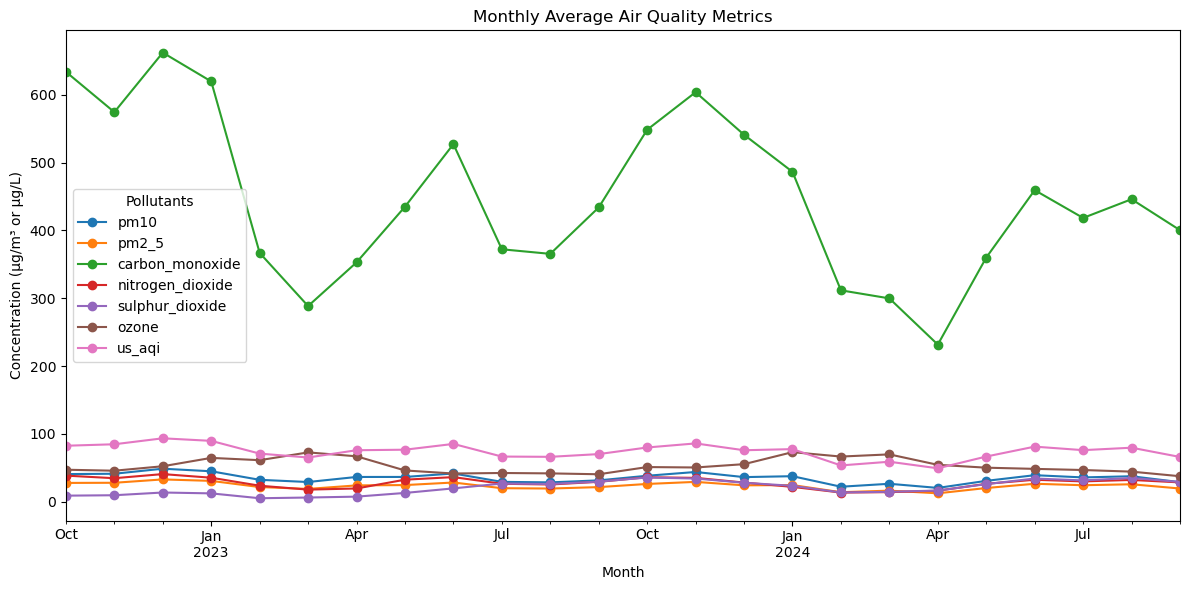

In [95]:
monthly_avg = df2.groupby('month_year')[['pm10', 'pm2_5', 'carbon_monoxide', 'nitrogen_dioxide', 
                                    'sulphur_dioxide', 'ozone', 'us_aqi']].mean()

plt.figure(figsize=(20, 6))
monthly_avg.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Monthly Average Air Quality Metrics')
plt.xlabel('Month')
plt.ylabel('Concentration (µg/m³ or µg/L)')
plt.legend(title="Pollutants")
plt.tight_layout()
plt.show()

#### **Comments**
Based on the line chart, we can observe the following:

* Carbon Monoxide (CO): This pollutant stands out with significantly higher concentrations than the others, fluctuating around 300–700 µg/m³. It shows a noticeable seasonal trend, with peaks around the last months of the year and lower concentrations in early summer. This suggests that CO levels might be influenced by weather conditions or emissions patterns, possibly from traffic or industrial activities.

* Other Pollutants: The rest of the pollutants (PM10, PM2.5, NO₂, SO₂, O₃, and US AQI) have relatively low concentrations compared to CO, all staying below 100 µg/m³. These pollutants exhibit smaller fluctuations and are generally stable throughout the year.

$\Rightarrow$ In summary, Carbon Monoxide levels appear to be the primary concern due to their high concentration and seasonal spikes, while other pollutants remain relatively low and stable across the months. This could indicate targeted issues related to CO pollution sources, potentially suggesting an area for further investigation or intervention.

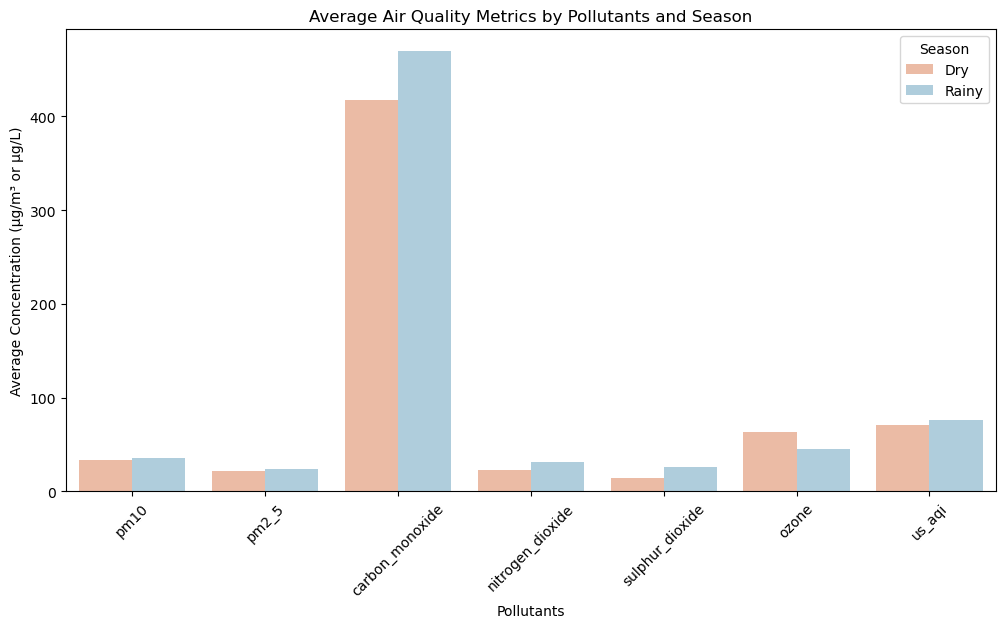

In [98]:
seasonal_avg = df2.groupby('season')[['pm10', 'pm2_5', 'carbon_monoxide', 'nitrogen_dioxide', 
                                      'sulphur_dioxide', 'ozone', 'us_aqi']].mean()

seasonal_avg = seasonal_avg.reset_index()
seasonal_avg_melted = pd.melt(seasonal_avg, id_vars='season', var_name='pollutant', value_name='average_concentration')


# Plotting seasonal air quality trends
plt.figure(figsize=(12, 6))
sns.barplot(data=seasonal_avg_melted, x='pollutant', y='average_concentration', hue='season', palette='RdBu')

# Thiết lập các thông số biểu đồ
plt.title('Average Air Quality Metrics by Pollutants and Season')
plt.xlabel('Pollutants')
plt.ylabel('Average Concentration (µg/m³ or µg/L)')
plt.legend(title='Season')
plt.xticks(rotation=45)
plt.show()


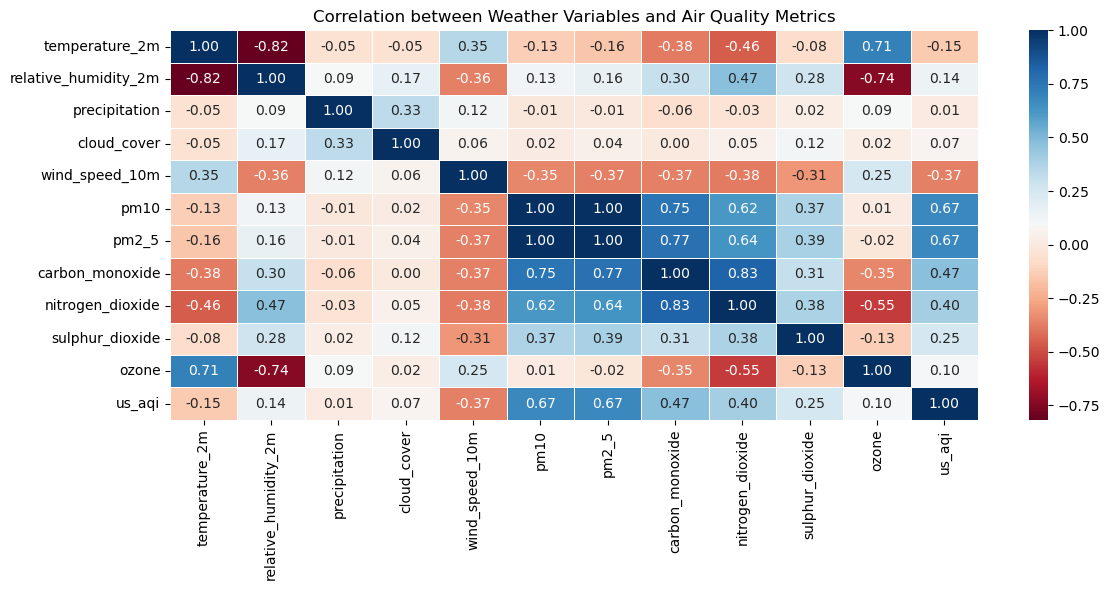

In [99]:
# Correlation between weather variables and air quality metrics
weather_columns = ['temperature_2m', 'relative_humidity_2m', 'precipitation', 'cloud_cover', 'wind_speed_10m']

# Calculate correlations between weather variables and air quality metrics
correlation_df = df2[weather_columns + ['pm10', 'pm2_5', 'carbon_monoxide', 'nitrogen_dioxide', 
                                        'sulphur_dioxide', 'ozone', 'us_aqi']].corr()

# Heatmap to visualize correlations between weather variables and air quality metrics
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_df, annot=True, cmap='RdBu', fmt='.2f', linewidths=0.5)
plt.title('Correlation between Weather Variables and Air Quality Metrics')
plt.tight_layout()
plt.show()

### Question 4: What is the relationship between precipitation and air quality? Does rainfall help reduce pollutant concentrations, and if so, to what extent?

**Answering this question will** clarify whether and how rainfall affects pollutant levels, offering insights into natural pollutant reduction mechanisms. This knowledge can support air quality management strategies, particularly in regions with varying rainfall patterns, and help inform public health recommendations during different weather conditions.

**How we answer this question:**
* Examine correlations between `precipitation` and pollutant levels (`pm10`, `pm2_5`, `us_aqi`) to see if rainfall consistently lowers pollutant concentrations.
* Compare average pollutant levels before, during, and after rainfall events to quantify the effect of precipitation on air quality.